# DAT301 Final Project Fall 2022
**Authors: Amber Kahklen (akahklen, 1216918261), Shaira Alam (salam13, 1216475247), Alyssa Stefencavage (astefenc, 1213852690)**

### Dataset and Information
**Income Prediction Based on Census Data** <br>

UCI's Machine learning Repository, Adult Data Set: <a href="https://archive.ics.uci.edu/ml/datasets/Adult">https://archive.ics.uci.edu/ml/datasets/Adult</a> <br>

- The dataset provides census information in relation to if income is above or below $50,000 a year
- The data extration was done by Berry Becker and was taken from the 1994 census database
- Due to the fact that the dataset is from 1994 the data unfortunetely does not take into account inflation up until the current year

### Information on Data

**age**: continuous.

**workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov,    Without-pay, Never-worked.
            
**fnlwgt**: continuous. 
- The number of people one row represents

**education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 
            7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.
            
**education-num**: continuous.

**marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, 
                Married-spouse-absent, Married-AF-spouse.
- Married-civ-spouse: Married to a civilian
- Married-AF-spouse: Married to someone in the Armed Forces
                
**occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, 
            Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving,             Priv-house-serv, Protective-serv, Armed-Forces.
            
**relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

**race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

**sex**: Female, Male.

**capital-gain**: continuous

**capital-loss**: continuous

**hours-per-week**: continuous.

**native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, 
                  Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran,                       Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal,                         Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia,                      Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador,                       Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

### Motivation

- To gain a perspective on the different impacts of various categories on the amount of money people make
- To help us understand possible things that could affect our wage and possible things to avoid that could hinder us

### Setup

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
from sklearn import tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error


df = pd.read_csv("adultdata.csv")

#These next two lines get rid of any null or NaN values
df.replace(' ?', None, inplace = True)
df = df.dropna()

#BLELOW HERE FOR SETUP is all transforming string values into int values for the Random Forest Classifier
df_allnums = df
df_allnums.columns = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "wage_below_orAbove_50k"]
df_allnums.workclass.replace((' Private', ' Self-emp-not-inc', ' Self-emp-inc', ' Federal-gov', ' Local-gov', ' State-gov', ' Without-pay', ' Never-worked'), (1, 2, 3, 4, 5, 6, 7, 8), inplace = True)
df_allnums.marital_status.replace((' Married-civ-spouse', ' Divorced', ' Never-married', ' Separated', ' Widowed', ' Married-spouse-absent', ' Married-AF-spouse'), (1, 2, 3, 4, 5, 6, 7), inplace = True)
df_allnums.occupation.replace((' Tech-support', ' Craft-repair', ' Other-service', ' Sales', ' Exec-managerial', ' Prof-specialty', ' Handlers-cleaners', ' Machine-op-inspct', ' Adm-clerical', ' Farming-fishing', ' Transport-moving', ' Priv-house-serv', ' Protective-serv', ' Armed-Forces'), (1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14), inplace = True)
df_allnums.relationship.replace((' Wife', ' Own-child', ' Husband', ' Not-in-family', ' Other-relative', ' Unmarried'), (1, 2, 3, 4, 5, 6), inplace = True)
df_allnums.race.replace((' White', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other', ' Black'), (1, 2, 3, 4, 5), inplace = True)
df_allnums.sex.replace((' Female', ' Male'), (1, 2), inplace = True)
df_allnums.native_country.replace((' United-States',' Cambodia',' England',' Puerto-Rico',' Canada',' Germany',' Outlying-US(Guam-USVI-etc)',' India',' Japan',' Greece',' South',' China',' Cuba',' Iran',' Honduras',' Philippines',' Italy',' Poland',' Jamaica',' Vietnam',' Mexico',' Portugal',' Ireland',' France',' Dominican-Republic',' Laos',' Ecuador',' Taiwan',' Haiti',' Columbia',' Hungary',' Guatemala',' Nicaragua',' Scotland',' Thailand',' Yugoslavia',' El-Salvador',' Trinadad&Tobago',' Peru',' Hong',' Holand-Netherlands'), (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41), inplace = True)
df_allnums.wage_below_orAbove_50k.replace((' <=50K', ' >50K'), (0, 1), inplace = True)

### Random Forest Classifier

In [18]:
x = df_allnums.loc[:, ["age", "workclass", "fnlwgt", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country"]]
y = df_allnums.wage_below_orAbove_50k

#splits data 25% test sets and 75% training sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0)

#randomForestClassifier = RandomForestClassifier(criterion = "gini", random_state = 100, max_depth = 3, min_samples_leaf = 5)
#model_randomForestC = randomForestClassifier.fit(xtrain, ytrain)
#predict = randomForestClassifier.predict(xtest)
#confusionMatrix = confusion_matrix(ytest, predict)
#mse = mean_squared_error(ytest, predict)

df_label = df_allnums

**Confusion Matrix**

In [19]:
#print(confusionMatrix)

**Mean Squared Error**

In [20]:
#print(mse)

- The top left value in the confusion matrix is the number of True Positives (TP = 5560)
- The top right value in the confusion matrix is the number of False Negatives (FN = 171)
- The bottom left value in the confusion matrix is the number of False Positives (FP = 1042)
- The bottom right value in the confusion matrix is the number of True Negatives (TN = 768)

**Using the equations for accuracy, precision, sensitivity, specificity, and F-score we are going to calculate the performance metrics:**

Accuracy = (TP + TN)/(TP + TN + FP + FN)

Precision = TP/(TP + FP)

Sensitivity = TP/(TP + FN)

Specificity = TN/(TN + FP)

F-score = 2((Precision*Sensitivity)/(Precision + Sensitivity)

**Using those equations we get:**

Accuracy = (5560 + 768)/(5560 + 768 + 1042 + 171) = 0.8391

Precision = 5560/(5560 + 1042) = 0.8422

Sensitivity = 5560/(5560 + 171) = 0.9702

Specificity = 768/(768 + 1042) = 0.4243

F-score = 2((0.8422*0.9702)/(0.8422 + 0.9702) = 0.9016

### 1. How many people are there for each education category? 

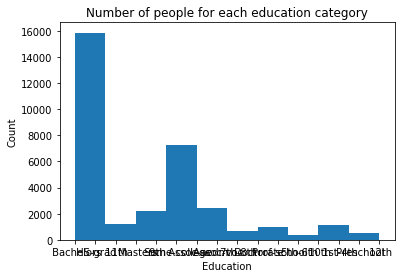

In [10]:
y = df.education

plt.hist(y)
plt.xlabel("Education")
plt.ylabel("Count")
plt.title("Number of people for each education category")
plt.show()

### 2. How many people make above or below 50k? 

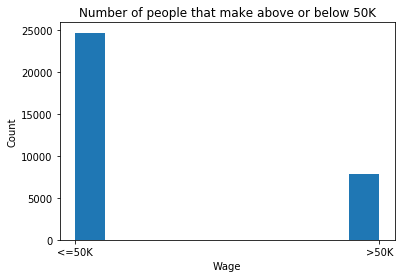

In [11]:
df_label.wage_below_orAbove_50k.replace((0, 1), ('<=50K', '>50K'), inplace = True)

y = df.wage_below_orAbove_50k

plt.hist(y)
plt.xlabel("Wage")
plt.ylabel("Count")
plt.title("Number of people that make above or below 50K")
plt.show()

### 3. Number of people per occupation

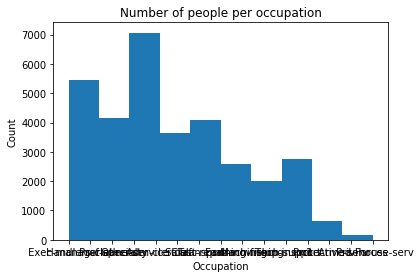

In [12]:
df_label.occupation.replace((1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14), (' Tech-support', ' Craft-repair', ' Other-service', ' Sales', ' Exec-managerial', ' Prof-specialty', ' Handlers-cleaners', ' Machine-op-inspct', ' Adm-clerical', ' Farming-fishing', ' Transport-moving', ' Priv-house-serv', ' Protective-serv', ' Armed-Forces'), inplace = True)

y = df_label.occupation
plt.hist(y)
plt.xlabel("Occupation")
plt.ylabel("Count")
plt.title("Number of people per occupation")
plt.show()

### 4. What is the average age per workclass? 

In [15]:
df_label.workclass.replace((1, 2, 3, 4, 5, 6, 7, 8), (' Private', ' Self-emp-not-inc', ' Self-emp-inc', ' Federal-gov', ' Local-gov', ' State-gov', ' Without-pay', ' Never-worked'), inplace = True)

# print(df_label.workclass.iloc[:2])
# df_age = pd.DataFrame({' data': df_label.age, 'Category': df_label.workclass})
# y = df_age.groupby('Category'). mean()

# plt.bar(x, y)
# plt.xlabel("Workclass")
# plt.ylabel("Age")
# plt.title("Number of people that make above or below 50K")
# plt.show()

### 5.  How many people over 50 make more than 50k

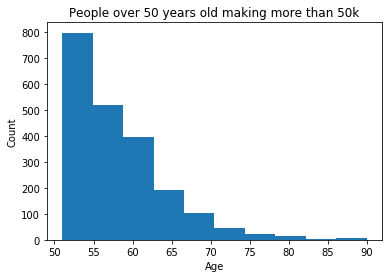

In [81]:
df_age = df[df.eval("age>50 & wage_below_orAbove_50k.str.startswith('>').values")]
plt.hist(df_age.age)
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("People over 50 years old making more than 50k")
plt.show()

### 6.  How many with High School Educaiton make more than 50k

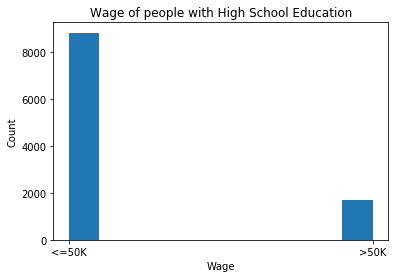

In [82]:
df_edu = df[df.eval("education.str.contains('HS').values")]
plt.hist(df_edu.wage_below_orAbove_50k)
plt.xlabel("Wage")
plt.ylabel("Count")
plt.title("Wage of people with High School Education")
plt.show()